# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [3054]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

*Commenting the above code, as these are older version and throws an error*

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3057]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# import library to perform statistical computation.It's a growing library of statistical functions and contains large number of probability distributions 
import scipy.stats as stats

## Reading the Data into a DataFrame

In [3059]:
# To run the following lines for Google Colab, uncomment this code of lines
# from google.colab import drive
# drive.mount('/content/drive')

In [3060]:
#loading and reading the required dataset into Dataframe from jupyter notebook
df=pd.read_csv('abtest.csv')

In [3061]:
#make a copy of dataset
df_copy=df.copy()


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Data Overview

#### Displaying the first 5 rows of the dataset

In [3066]:
#read first 5 dataset using head() function
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480,no,Spanish
1,546468,treatment,new,7.130,yes,English
2,546462,treatment,new,4.400,no,Spanish
3,546567,control,old,3.020,no,French
4,546459,treatment,new,4.750,yes,Spanish


The `head()` function will display first 5 rows of the Enews_Express dataset here.

#### Displaying random 5 rows of the dataset

In [3069]:
#Display random 5 rows in the dataset using sample(n=5)
df.sample(n=5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
74,546591,control,old,4.870,no,Spanish
78,546486,treatment,new,9.120,yes,French
37,546557,control,old,6.040,yes,English
23,546475,treatment,new,7.020,yes,English
27,546586,control,old,4.050,no,Spanish


`sample(n=5) ` function will display any randomly selected 5 rows of the dataset here, instead of fetching first 5 or last 5 rows using head() and tail() functions respectively.

#### Displaying the last 5 rows of the dataset

In [3072]:
#display last 5 rows of the dataset using tail(5)
df.tail()  # tail() function will return last 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.150,no,Spanish
96,546544,control,old,6.520,yes,English
97,546472,treatment,new,7.070,yes,Spanish
98,546481,treatment,new,6.200,yes,Spanish
99,546483,treatment,new,5.860,yes,English


#### Checking the shape of the dataset

In [3074]:
# Using shape attributes we can determine the number of rows and columns present in the dataset
df.shape
print('There are',df.shape[0],'rows and',df.shape[1],'columns in the given dataset.')

There are 100 rows and 6 columns in the given dataset.


- *There are 100 rows and 6 columns present in the given dataset.*

#### Checking the data types of the columns

In [3077]:
#Display datatypes of the different columns using info() function . It also provide informations on missing data in any columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:

- *There are `100 rows` and `6 columns` present in the dataset*.
- *`user_id` unique identifier(Unique user ID of a person visiting the website) of datatype `int` and ` time_spent_on_the_page` of datatype `float` are       the 2 numerical data columns*
- *The remaining 4 data columns `group`,`landing_page` , `converted` and `language_preferred` are categorical data of type `object`and stored as a String*
- *There are `100 non-null` values in each columns indicating `no missing` or null values present in the given dataset*
- *There are `no duplicates` entries*
  

#### Check for null/missing value

In [3081]:
#checking for null value
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

- *As observed earlier the dataset contains no null values in any of the columns.*

#### Check for duplicate entries

In [3084]:
df.duplicated().sum()

0

- *As observed earlier the dataset contains no duplicates rows.*

#### Check the statistical summary of the data

In [3087]:
#Display statistical summary of the data only numerical columns
df.describe().T  


,count,mean,std,min,25%,50%,75%,max
user_id,100.000,546517.000,52.296,546443.000,546467.750,546492.500,546567.250,546592.000
time_spent_on_the_page,100.000,5.378,2.378,0.190,3.880,5.415,7.022,10.710


In [3088]:
#Display statistical summary of the data for all columns
df.describe(include='all').T  # include='all' will display statistical summary for all the columns including categorial data.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.000,NaN,NaN,NaN,546517.000,52.296,546443.000,546467.750,546492.500,546567.250,546592.000
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.000,NaN,NaN,NaN,5.378,2.378,0.190,3.880,5.415,7.022,10.710
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- *The `describe()` function will display the summary statistics of the numerical data. To view summary statistics of both numerical and categorical data we use describe(include='all')*.

**Statistical observations:**

- *`user_id` : It's an unique user ID of the users, who has visited the website. The dataset contains the details about `100` users` visited the news portal*.
  
- *`group` : There are 2 groups (`control`, belongs to first group) and (`treatment`, belongs to second group) which are divided equally (count=50)*
  
- *`landing_page` : The landing_page columns is a categorical data and are again divided equally for both old and new landing page*

- *`time_spent_on_the_page` : On an average the users spends around `5.37` minutes on the Landing page(both new and old page), with minimum of .19 minutes     and maximum of `10.7` minutes.*
  
- *`converted` : `54 customers` had subscribed to the news portal, who belongs to either of the groups*
  
- *`language_preferred` : The portal offers 3 different languages `'Spanish,English and French` and looks like `Spanish` is the most preferred language*


Lets check different categories and it's counts in categorical columns 'group', 'landing_page' and 'language_preferred' for additional informations.

In [3092]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

In [3093]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

In [3094]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

Observation: 

- *The dataset contains `2 population (group=control / treatment)` which are divided equally ( 50 in each group and landing page) for observing users         behaviors like time spent, different languages preferences and conversion rates) on new and old landing page.*
  
- *We have also notice that the different language (Spanish , English and French) users users count are same in both the groups for testing new/old           landing page*
  

### Univariate Analysis

Lets do univariate analaysis for below columns to visualize the dataset:
- user_id
- group
- landing_page
- time_spent_on_the_page
- converted
- language_preferred 

**User Id**

In [3099]:
# check and display the unique user ID  
df['user_id'].nunique()
print('There are',df['user_id'].nunique(),'unique user ID')


There are 100 unique user ID


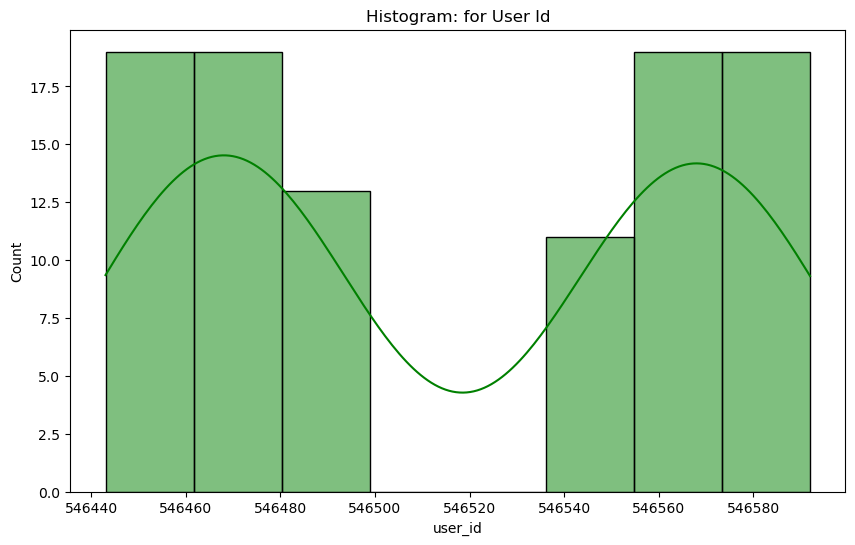

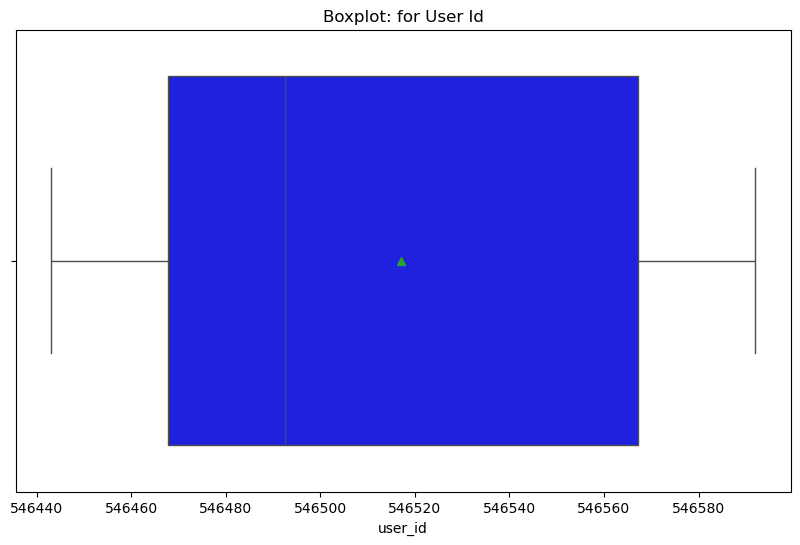

In [3100]:
#Create a histplot,boxplot and countplot for user_id
#histplot
plt.figure(figsize=(10,6))
plt.title('Histogram: for User Id')
sns.histplot(data=df,x='user_id', color='green',kde=True)
plt.show()

#boxplot
plt.figure(figsize=(10,6))
plt.title('Boxplot: for User Id')
sns.boxplot(data = df,x = 'user_id', color='blue', showmeans = True);
plt.show()

*Since `user_id is a unique identifier`, plotting a univariate graph for user_id is `not meaningful`.*

**Group**

In [3103]:
df['group'].nunique()

2

In [3104]:
df['group'].value_counts()
group_control_count=df['group'].value_counts()['control']
group_treatment_count=df['group'].value_counts()['treatment']
print(f'There are 2 groups, control={group_control_count} and treatment={group_treatment_count}.')

There are 2 groups, control=50 and treatment=50.


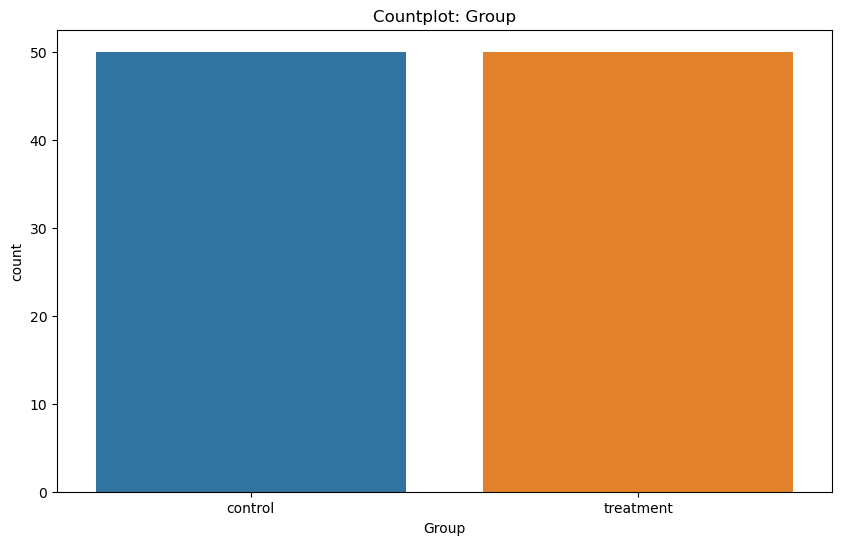

In [3105]:
#create a countplot for group

plt.figure(figsize=(10,6))
plt.xlabel('Group')
plt.title('Countplot: Group')
sns.countplot(data=df,x='group',hue='group');
plt.show();

- *The dataset contains `2 groups- first group (control)` and `second group (treatment)` with equal frequencies(count=50) i.e. users are divided equally       into both the groups.*

**Landing Page**

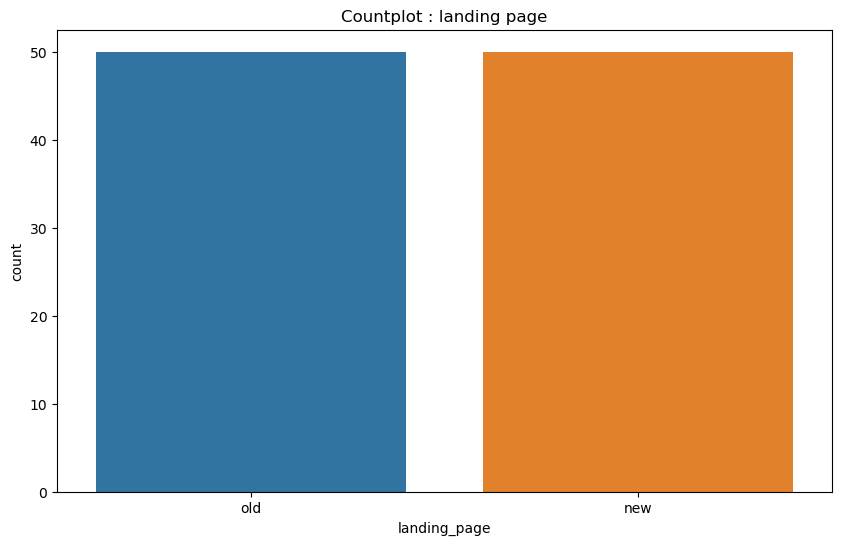

In [3108]:
#countplot for landing_page

plt.figure(figsize=(10,6))
plt.xlabel('landing_page')
plt.title('Countplot : landing page')
sns.countplot(data=df,x='landing_page',hue='landing_page');
plt.show();


- *We can see from the above plot that `half of the users (count=50) are introduced to new landing page` while other half are tested on old landing page.*

**Time Spent On The Page**

In [3111]:
df.time_spent_on_the_page.nunique()

94

In [3112]:
print('The maximum and the minimum time spent by customer on landing page are',df.time_spent_on_the_page.max(),'and',df.time_spent_on_the_page.min(),'minutes resp.')


The maximum and the minimum time spent by customer on landing page are 10.71 and 0.19 minutes resp.


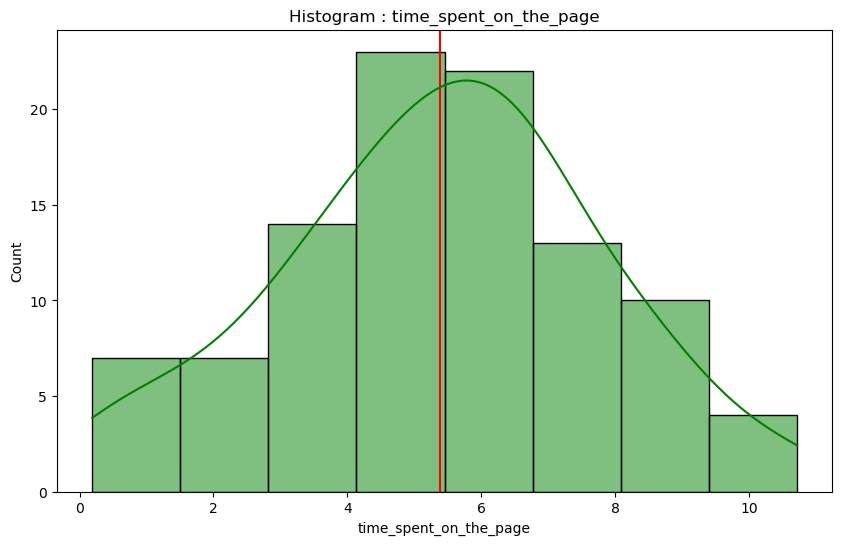

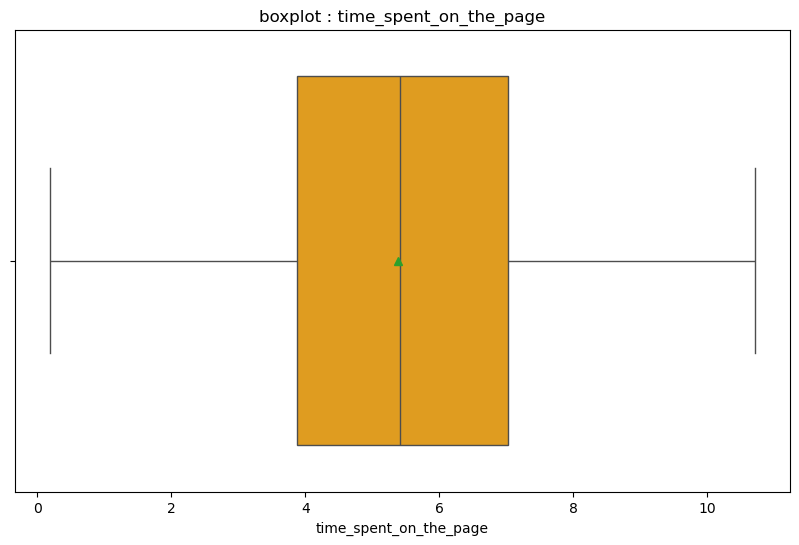

In [3113]:
#Histplot for time_spent_on_the_page
plt.figure(figsize=(10,6))
plt.title('Histogram : time_spent_on_the_page')
plt.axvline(df['time_spent_on_the_page'].mean(),color='r')
sns.histplot(data=df,x='time_spent_on_the_page',color='green',kde=True)
plt.show()

#boxplot for time_spent_on_the_page
plt.figure(figsize=(10,6))
plt.title('boxplot : time_spent_on_the_page')
sns.boxplot(data=df,x='time_spent_on_the_page',showmeans=True,color='orange')
plt.show()

From the above plots we can see,

- *`On an average` the users spent around `5.3 mins` of time on landing page.*
- *The `min and max time` a customers spent on the news portal are `.19 and 10.71 minutes` respectively.*
- *`50 percent (interquartile range (IQR)` of users spend `aprox 4-7 mins of time` on landing page.*
- *There are `no outliers present` and data is symmetric (mean=median=mode) with no skewness.*
  


**Additional analysis on time_spent_on_the_page**

- *There are `94` unique `time_spent_on_the_page` values and plotting the different time value (94 counts ) without categorizing will make countplot less meaningful.*
- *Lets divide the `time frame (time_spent_on_the_page) into 5 different bins`, based on time range, to make analysis and count plots more meaningful*

- *Since we have seen from statistical summary and also from above query, the `min and max time` a customers spent on the news portal is `.19 and 10.71 minutes` respectively.*

      Lets create bins for `time_spent_on_the_page` column using **pd.cut() function**

        bin 1: less than a minutes  `Poor engagement`<br>
        bin 2: 1-3 minutes          `Below average`<br>
        bin 3: 3-5 minutes          `Average`<br>
        bin 4: 5-8 minutes          `Good`<br>
        bin 5: 8 and above          `Exceptional`<br>

        *`Syntax:` pd.cut(x, bins, labels=None, right=False)*
    
        x - column/array to binned<br>
        bins - number of bins to create or an input of list for the range of bins<br>
        labels - specifies the labels for the bins<br>
        right - If set to False, it excludes the rightmost edge of the interval<br>

In [3117]:
#Create bins for `time_spent_on_the_page` column using **pd.cut() function***
df['time_spent_bin']=pd.cut(df['time_spent_on_the_page'],bins=[0,1,3,5,8,11],labels=['Poor engagement','Below average','Average','Good','Exceptional'],right=False)


In [3118]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,time_spent_bin
0,546592,control,old,3.480,no,Spanish,Average
1,546468,treatment,new,7.130,yes,English,Good
2,546462,treatment,new,4.400,no,Spanish,Average
3,546567,control,old,3.020,no,French,Average
4,546459,treatment,new,4.750,yes,Spanish,Average


In [3119]:
#Display the counts in each time range
df['time_spent_bin'].value_counts()

time_spent_bin
Good               44
Average            26
Exceptional        15
Below average       9
Poor engagement     6
Name: count, dtype: int64

In [3120]:
#Display the percentage results
df['time_spent_bin'].value_counts(normalize=True)

time_spent_bin
Good              0.440
Average           0.260
Exceptional       0.150
Below average     0.090
Poor engagement   0.060
Name: proportion, dtype: float64

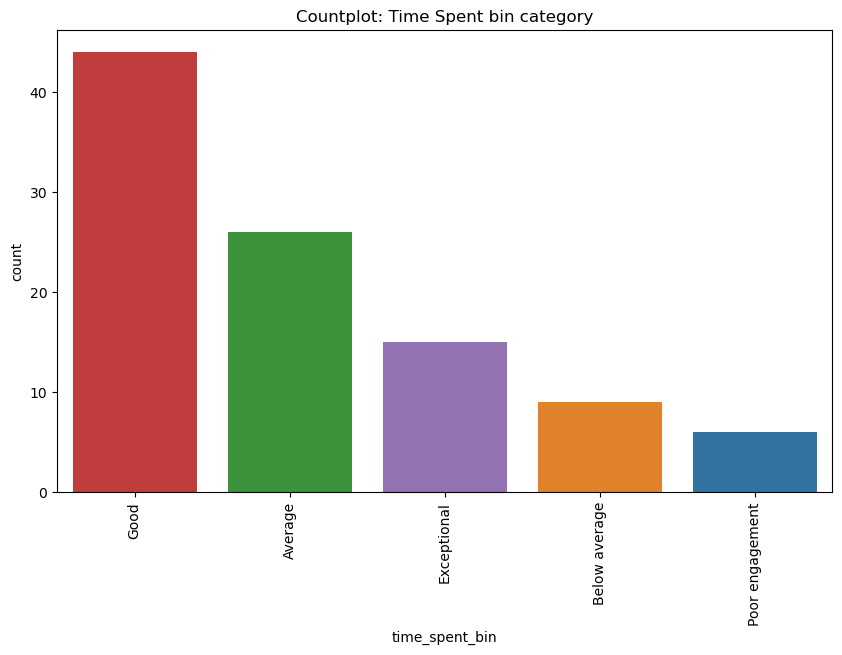

In [3121]:
#countplot for column time_spent_on_the_page with time_spent_bin)

plt.figure(figsize=(10,6))
plt.xlabel('time_spent_bin')
plt.xticks(rotation=90)
plt.title('Countplot: Time Spent bin category')
sns.countplot(data=df,x='time_spent_bin',hue='time_spent_bin',order=df['time_spent_bin'].value_counts().index); #order here will plot the graph in descending order(counts)
plt.show();

Observation:

- *Based on the time_spent_bin count plot, we can see `44 percent` of customer spent a `Good amount of time` on landing page in a range of abount `5-8 minutes`, followed by 26% of customer with `Average time of 3-5 minutes`*.
  
- *In shorts around `70% of customer` spends `3-8 minutes` of times on landing page of E-news Express portal.*
  
Note this analysis contains data for both the groups


**Converted**

In [3124]:
df['converted'].value_counts(normalize=True)

converted
yes   0.540
no    0.460
Name: proportion, dtype: float64

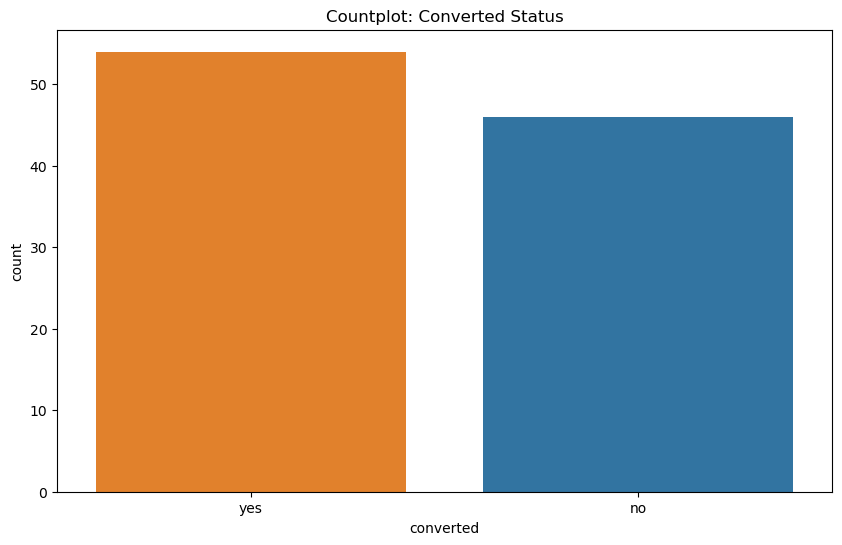

In [3125]:
#countplot

plt.figure(figsize=(10,6))
plt.xlabel('converted')
plt.title('Countplot: Converted Status')
sns.countplot(data=df,x='converted',hue='converted',order=df['converted'].value_counts().index); #order here will plot the graph in descending order(counts)
plt.show();


**Observation:**

- *From the above plot, `54 percent of user` had converted indicating people like the contents on the webpage.*
  
- *What attracts the users more? Is it the new landing page or the old features?  we need to dig in further in our bivariate analysis to check what are the factors affecting it.*

**Language Preferred**

In [3128]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

In [3129]:
lang_pref_sorted_count=df.language_preferred.value_counts().index

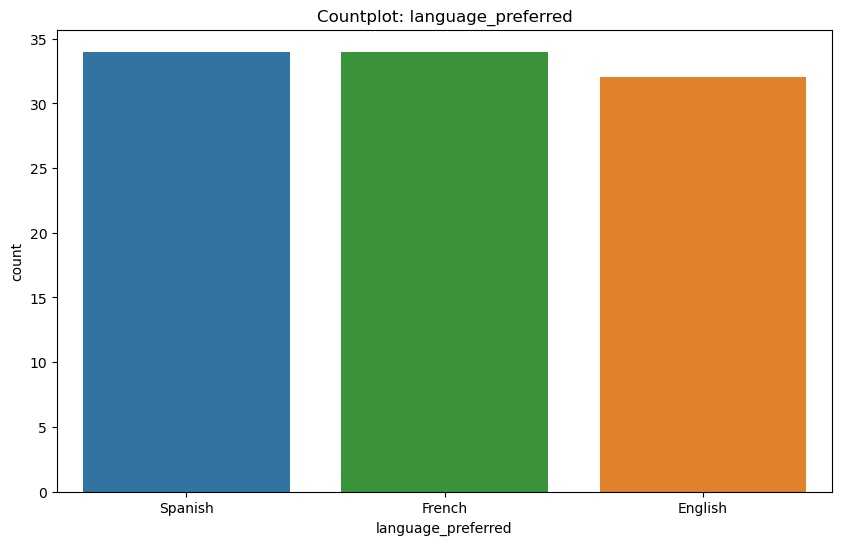

In [3130]:
#countplot
plt.figure(figsize=(10,6))
plt.xlabel('language_preferred')
plt.title('Countplot: language_preferred')
sns.countplot(data=df,x='language_preferred',hue='language_preferred',order=lang_pref_sorted_count);
plt.show();

- *Based on the above plot, the portal provides 3 languages `Spanish,French and English`.*
- *There are not much difference in different language users counts.`Spanish and French` are the `most preferred language` with the count of 34 each out of 100 users,* 

### Bivariate Analysis

Lets analyze how numerical column 'time_spent_on_page' is affected by landing page ,language preferred or 

**Time spent on the page vs Landing page**

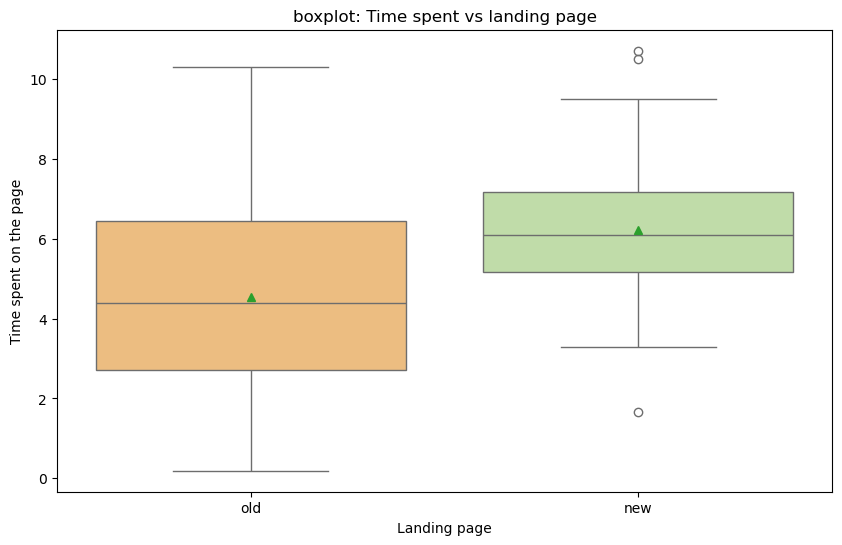

In [3135]:
plt.figure(figsize=(10,6))
plt.title('boxplot: Time spent vs landing page')
plt.xlabel('Landing page')
plt.ylabel('Time spent on the page')
sns.boxplot(data=df,y='time_spent_on_the_page',x='landing_page',hue = 'landing_page',palette = 'Spectral',showmeans=True);
plt.show();


**Observation**

*From the above boxplot , we can say that,*

- *`On an average` the users spends `more time(meantime aprox 6.2 mins) on new landing page`, when compared to `old landing page(meantime=4.5 mins)`,            indicating added new features and contents are engaging and interesting on new landing page*
  
- *`Few Outliers` are present on new landing page on both lower(less than 2 min) and higher ends(above 10 mins). Higher time spent could be because of           content very engaging or browsing multiple sections. More data and analysis are required to arrive at proper reasons.*
  
- *`median time` for `new landing page` users are `higher(approx to 6.1 mins)` than old landing page users(close to 4.4 mins).*  
  
- *`minimum time spent` by users on new landing page is around `3 minutes ` whereas it's less than 1 mins on old landing page, indicating less engaging            features on old page*
  
- *`Variations are more spreadout` in old landing page(wider IQR) compared to new indicating more data is spreadout in the middle 50%*.

**Time spent on the page vs language_preferred**

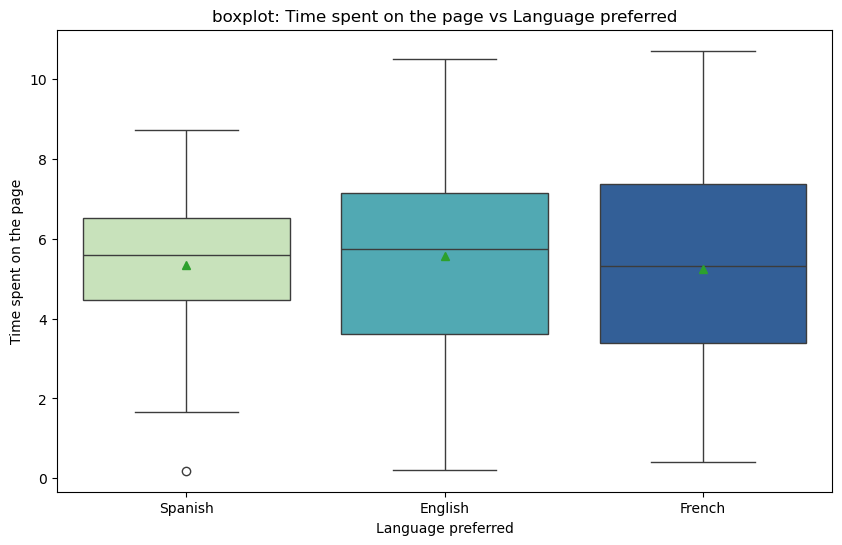

In [3138]:
plt.figure(figsize=(10,6))
plt.title('boxplot: Time spent on the page vs Language preferred')
plt.xlabel('Language preferred')
plt.ylabel('Time spent on the page')
sns.boxplot(data=df,y='time_spent_on_the_page',x='language_preferred',hue = 'language_preferred',palette = 'YlGnBu',showmeans=True);
plt.show();

**Observation:**

- *`Maximum time` spent by `French and English users` are `more` when compared to `Spanish users`, indicating few users are very engaging and spends more      time viewing/browsing the contents.*
  
- *`variations` are more spreadout for `French and English users` indicating diverse users.*
  
- *`Average time `spent by all languages users are approximately same and are close or equal to median.*
  
- *`50 % of all users`(median value) spend `less than 6 mins` of time on landing page.*
  
- *Time spend by `Spanish user` are in range between `1.6 to 8.8 mins approx` indicating less variations and narrow boxplot*
  
- *very slight skewness is present in spanish and English users.*

**Time spent on the page vs Conversion status**

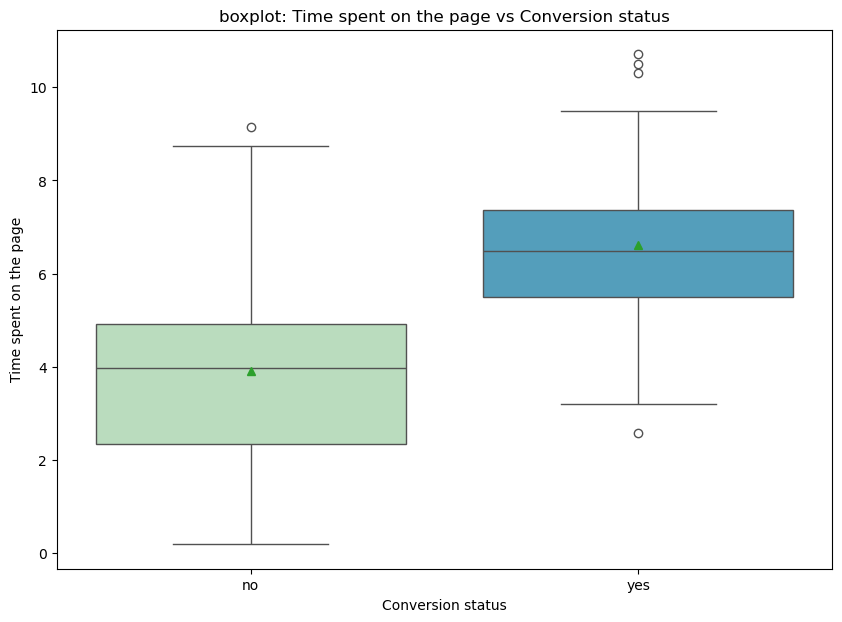

In [3141]:
plt.figure(figsize=(10,7))
plt.title('boxplot: Time spent on the page vs Conversion status')
plt.xlabel('Conversion status')
plt.ylabel('Time spent on the page')
sns.boxplot(data=df,y='time_spent_on_the_page',x='converted',hue = 'converted',palette = 'GnBu',showmeans=True);
plt.show();


**Observation**

- *`Time spent by converted users` are `more` when compared to non-converted users. Which is evident, if the users likes the content and features on the       portal tend to subscribe and therefore spent more time*
- *There are `few outliers` present at both ends of `converted users`, indicating few users are highly engaging and spent more time viewing/browsing the contents or new features on the portal.*
- *The `average and median time spent` by `converted users are higher` (close to 7 mins) than the `non-converted users(approx 4 mins)`.*
  
- *`one outlier is present for non-converted users at higher end`, indicating accidental visit or showing some interest in subscribing to the website, but then we need to dig in further to arrive at proper conclusion.*
- *`75 percent` of `non-converted users` spends `around 5 mins `of time on the landing page.which is little less than 25 percentile of time converted users spent(approx 5.4 mins)*

**Time spent on the page vs Group**

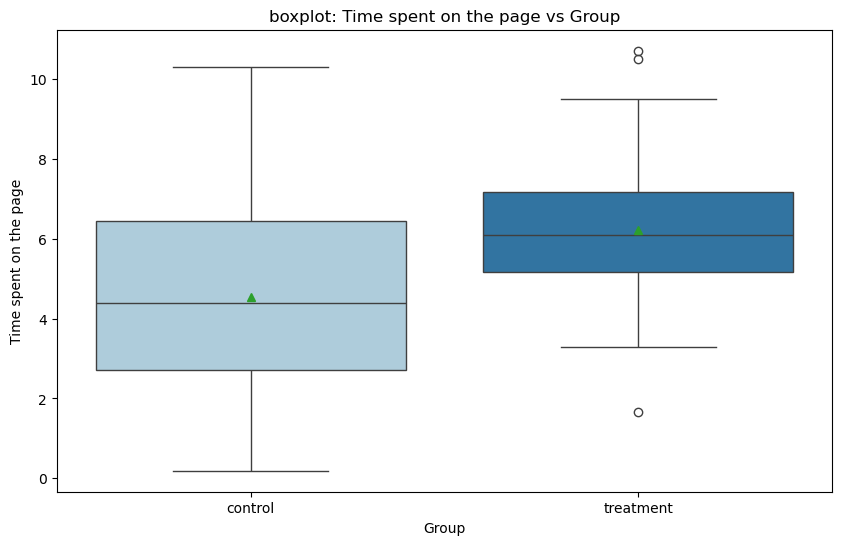

In [3144]:
plt.figure(figsize=(10,6))
plt.title('boxplot: Time spent on the page vs Group')
plt.xlabel('Group')
plt.ylabel('Time spent on the page')
sns.boxplot(data=df,y='time_spent_on_the_page',x='group',hue = 'group',palette = 'Paired',showmeans=True);
plt.show();


**Observation:**

- *`Time spent` by `treatment group` ranges from `3-9 mins`, little variations with narrow boxplot*.
  
- *`few outliers` are present at both the ends of `treatment group`, suggesting very engaged users browsing multiple sections or exploring/searching new       features.*
  
- *`Average and median time spent` by `treatment group` is `higher`(aprox 6.1 mins) than control groups(4.3 mins), indicating new landing page contains        more engaging contents and additional features, to glue their users.*
  
- *`Time spent by control group` is spreadout with wider box plot and ranges from `.19 -10.7 mins approx.`*
  
- *`No outliers` are present for the `control` group.*
  


#### Additional analysis:

**Conversion status under each group**

In [3148]:
#Display conversion status counts under each group in landing_page
df_converted_count_under_groups=df.groupby(['group','converted'])['landing_page'].count()
df_converted_count_under_groups

group      converted
control    no           29
           yes          21
treatment  no           17
           yes          33
Name: landing_page, dtype: int64

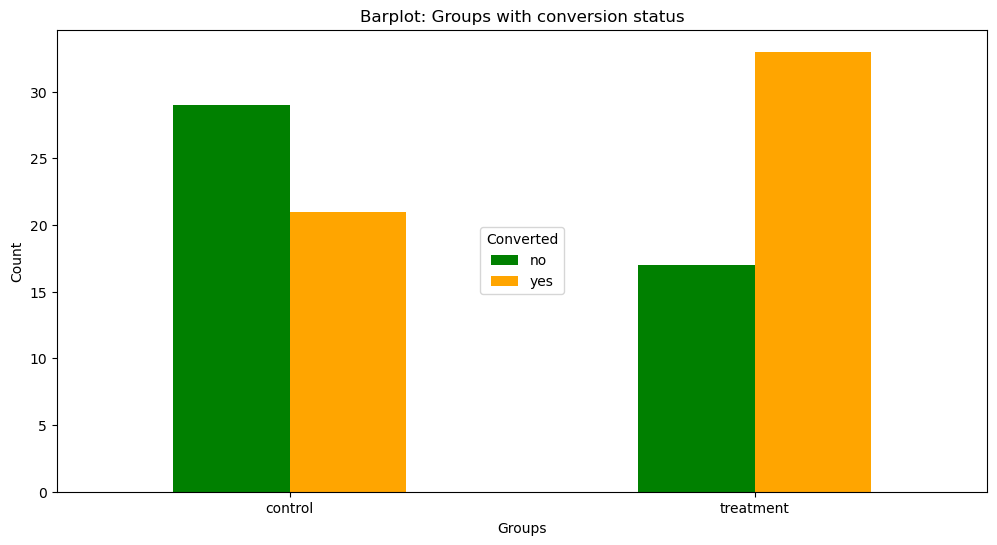

In [3149]:
# Unstack the multi-index DataFrame for plotting two categorical data
# Since df_converted_language_pref is a multi-index DataFrame, it needs to be unstacked to create separate bars for "yes" and "no" conversion statuses.

df_converted_count_under_groups_plot = df_converted_count_under_groups.unstack(level=1)

# Plot the group barplot to show the counts for converted categories(yes/no) under each groups
df_converted_count_under_groups_plot.plot(kind='bar', figsize=(12, 6), color=['green', 'orange'])

# Add title, labels, and legend
plt.title('Barplot: Groups with conversion status')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.legend( title='Converted', loc='center', fontsize=10)

# Adjust x-axis labels
plt.xticks(rotation=0)
plt.show()


**Observation**

- *`Conversion rates` are `higher in treatment` group (around `66 percent`) when compared to `control group( 42 percent)` , indicating users found the new landing page more engaging and exciting than the old page*
  

**Multivariate Analysis:**

#### Time spent in each Group vs conversion rate

- Lets check, how `users spent time on the landing page` in each group(control and treatment) and `how many of them have converted`(i.e subscribed to the portal).

- We will use `catplot` this time, which provides a new framework giving access to several types of plots that show relationship between numerical variable and one or more categorical variables.

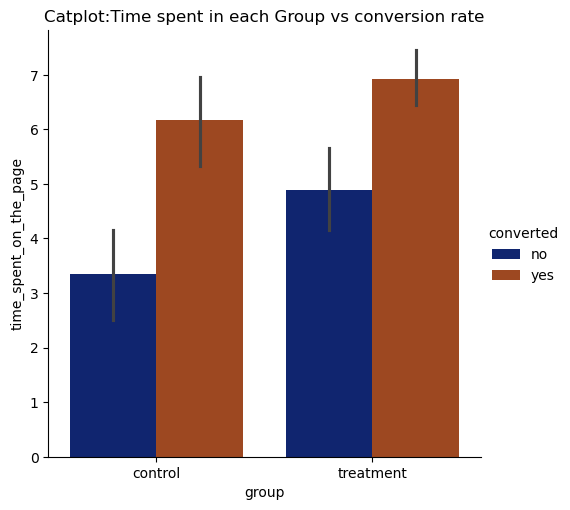

In [3154]:
#create a catplot with kind =bar plot, to show how customer spent time on the landing page in each group and how many of them have converted


sns.catplot(data=df, kind="bar", x="group", y="time_spent_on_the_page", hue="converted", palette="dark")
plt.title("Catplot:Time spent in each Group vs conversion rate");


- *We can see from above catplot that `average time spent by users in the control group` when `converted `are `slightly less(approx 6.2 mins) `than the one from `treatment group(around 7 mins)`.*
  
- *`Control group`: There is significant difference in time spent on the landing page between the users who are converted(6.2 mins) and not-converted(3.3 mins).*
  
- *`Treatment group`: There is significant difference in time spent on the landing page between the users who are converted(approx 7 mins) and not-converted(close to 5 mins).*
  
- *We do observe that `conversion rates are high when users spents more time on the landing page(new or old)`, indicating they find the contents engaging. Further statistical analysis will shed more light on this*

#### Time spent in each Group by different language users

- *Lets create catplot to show `how customer spent time` on the landing page `in each group with preferred language`.*

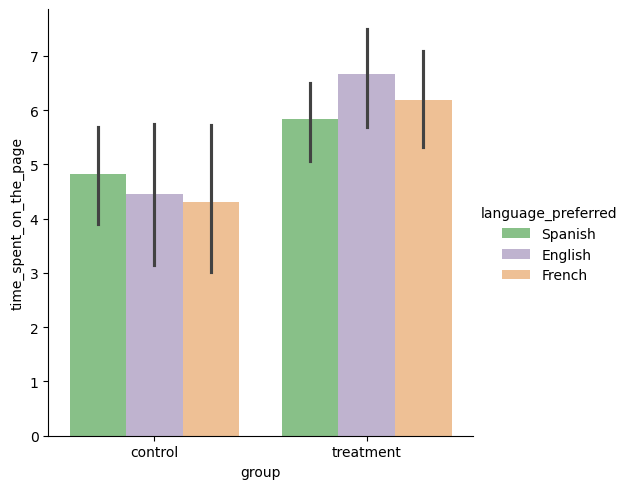

In [3158]:
#create a catplot with kind =bar plot, to show how customer spent time on the landing page in each group with preferred language

g=sns.catplot(data=df, kind="bar", x="group", y="time_spent_on_the_page", hue="language_preferred", palette="Accent");


- *We can see from above catplot that `average time spent by users in the control group` for the different language users` are ` less than for all the languages than the one from `treatment group`.*
  
- *It is interesting to see the `average time spent by English users(4.5 mins approx)` was `less than Spanish users(4.9 mins approx) in control group` but they are `higher in treatment group(English user= 6.8 mins approx; Spanish=5.9 mins approx)`.<br>
  Indicating English users found the new landing page more engaging and exciting. Same holds good for `French Users when compared with Spanish users`.*
  


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [3162]:
df.groupby('landing_page')['time_spent_on_the_page'].mean()


landing_page
new   6.223
old   4.532
Name: time_spent_on_the_page, dtype: float64

In [3163]:
cond=df['landing_page']=='new'
df[cond].sort_values(by='time_spent_on_the_page',ascending=False).head(n=50).describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,50.000,546467.500,14.577,546443.000,546455.250,546467.500,546479.750,546492.000
time_spent_on_the_page,50.000,6.223,1.817,1.650,5.175,6.105,7.160,10.710


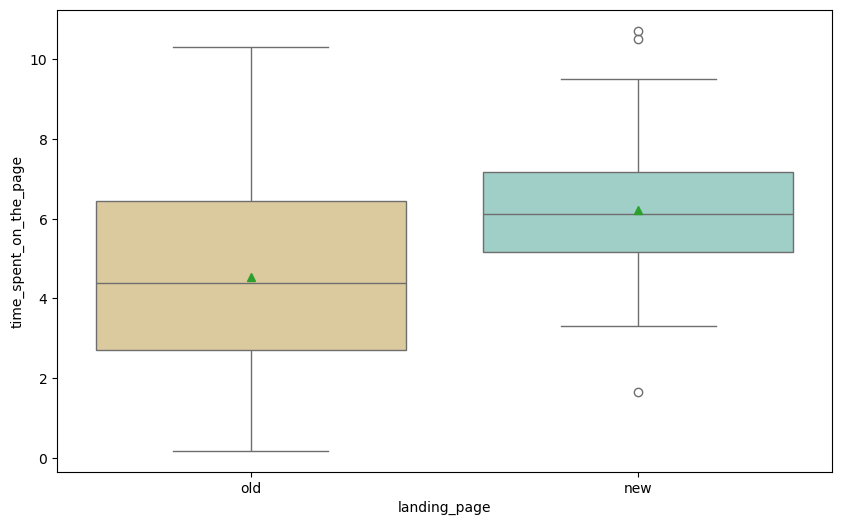

In [3164]:
#create plot for each group vs time spent
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',hue='landing_page',palette='BrBG',showmeans=True);

*From the above boxplot , we can say that,*

- *On an `average` the customer `spends more time(meantime aprox 6.2 mins) on new landing page`, when compared to old landing page(meantime=4.5 mins).*
  
- *`Few Outliers` are present on new landing page on both lower(less than 2 min) and higher ends(above 10 mins).*
  
- *`50% of users` spent approx than 4.3 minutes on landing_page of old portal,compared to new landing page where they spend close to 6 minutes.*
  
- *minimum time spent by customers on new landing page is around 3 minutes whereas it's less than 1 mins on old landing page, which indicate the new landing page has more attractive features and engaging content*
  

### Step 1: Define the null and alternate hypotheses

**null hypothesis:**<br>

$H_0$:  user spends less or equal time on the new landing page than the existing landing page.

**alternative hypothesis:**<br>

$H_a$:  user spends more time on the new landing page than the existing landing page



### Step 2: Select Appropriate test

- *This is `two sample T test` concerning two population means from two independent populations with population standard deviation unknown(t test), 
also it's `one-tailed test`since the research question is about greater than and not on the equality.*

### Step 3: Decide the significance level

- *From the question, the significance level is given  $\alpha = 0.05$.*


### Step 4: Collect and prepare data

Steps involved in performing 2 sample independent t test.

`step1:` find the sample standard deviation and check if they are equal or not

`step2:` extract the required column data from the dataframe

`step3:` substitute the correct value for all the collected data in the given fn 

        [test_stats,p_value=ttest_ind(a,b,equal_var = False, alternative = 'greater')
where,<br>
`a and b` are column data from step 2; <br>
`equal_var`  =False/True from the result of step 1 <br>
`alternative`='greater','lesser',two-tailed' based on alternative test type<br>


In [3174]:
from scipy.stats import ttest_ind

#Step1: find the sample means and sample standard deviations for the two samples populations

landing_pg_means=df.groupby('landing_page')['time_spent_on_the_page'].mean()
landing_pg_sd=df.groupby('landing_page')['time_spent_on_the_page'].std()

#sample mean
new_landing_pg_mean=landing_pg_means['new'] #new landing page sample mean
old_landing_pg_mean=landing_pg_means['old'] #old landing page sample mean

#sample standard deviation
new_landing_pg_sd=landing_pg_sd['new'] #new landing page standard deviation
old_landing_pg_sd=landing_pg_sd['old'] #old landing page standard deviation

#print the results
print('Sample mean for old landing page is:',round(old_landing_pg_mean,2))
print('Sample mean for new landing page is:',round(new_landing_pg_mean,2))
print('Sample standard deviation for old landing page is:',round(old_landing_pg_sd,2))
print('Sample standard deviation for new landing page is:',round(new_landing_pg_sd,2))

Sample mean for old landing page is: 4.53
Sample mean for new landing page is: 6.22
Sample standard deviation for old landing page is: 2.58
Sample standard deviation for new landing page is: 1.82


- *From the above result variance are not equal therefore equal_var=False*

In [3176]:
#timespent on old and new landing page
time_spent_old_Landng_pg=df[df['landing_page']=='old']['time_spent_on_the_page']
time_spent_new_Landng_pg=df[df['landing_page']=='new']['time_spent_on_the_page']


### Step 5: Calculate the p-value

In [3178]:
#calculate test_stats and p_value
test_stats,p_value=ttest_ind(time_spent_new_Landng_pg,time_spent_old_Landng_pg,equal_var = False, alternative = 'greater')
print(test_stats,p_value)

3.7867702694199856 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [3180]:
#since p_value (.000139)is less the .05

# compare p_value with level of significance and print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

- *Since the `p-value i.e probability value is less than level of significance` **$\alpha$*** =.05, *hence we have enough statistical evidence to `reject the Null hypothesis` and therefore can conclude that `users spend more time on the new landing page than the existing landing page`*. 

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

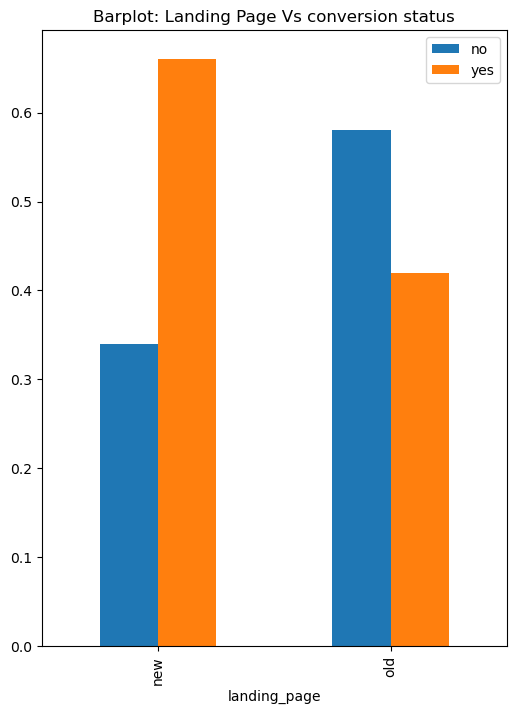

In [3185]:
# create a crosstab and plot to compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=False)
plt.title('Barplot: Landing Page Vs conversion status')
plt.legend()
plt.show()

**Additional plot to display the counts for landing page vs conversion status**

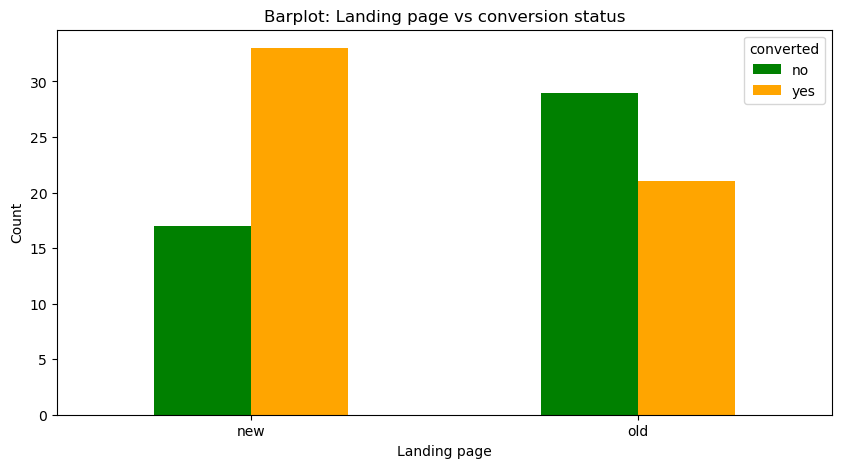

In [3187]:
#display the value counts for users who visits landing page(old and new) and get converted 
df_landng_pg_conv_all=df.groupby(['landing_page','converted'])['converted'].count()

#unstack the multi-index dataframe
df_landng_pg_conv_all_unstk=df_landng_pg_conv_all.unstack(level=1)

#plot the graph
df_landng_pg_conv_all_unstk.plot(kind='bar',figsize=(10,5),color=['green','orange'])

plt.title('Barplot: Landing page vs conversion status')
plt.xlabel('Landing page')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


- *`Conversion rates` are `higher in new landing page` (around `66 percent`) when compared to `old page( 42 percent)` , indicating users found the new landing page more engaging and exciting than the old page*

### Step 1: Define the null and alternate hypotheses

let p1 and p2 be the proportion of users converted after visiting the old and new landing page.

**Null hypothesis:**

$H_0$:  p1=p2

**Alternate hypothesis:**

$H_a$:  p2>p1

### Step 2: Select Appropriate test

- *This is a `one-tailed Two proportion Z-test` concerning two population proportions from two independent populations.* <br>

`Let's test whether the `Z-test assumptions` are satisfied or not

*   `Binomally distributed population` - Yes, users is either converted or not converted('yes'/'no').
*   `Random sampling from the population` - Yes, it's mentioned the collected sample is a simple random sample.  
*   Can the `binomial distribution` approximated to `normal distribution` - Yes. The standard thing is to check whether np and n(1-p) are greater than or      equal to 10. 

### Step 3: Decide the significance level

- *As given in the problem statement, we select $\alpha = 0.05$.*

### Step 4: Collect and prepare data

- *In this case the test statistic and p_value is calculated using the below function:*

`proportions_ztest(count, nobs, value=None, alternative='two-sided')`

where

- `count`: the number of successes in nobs trials. Here it's `converted success count in both the groups 'treatment' and 'control'`
- `nobs`: total number of trials or observations. Here it's the `total number of users in each groups ('treatment' and 'control')`.
- `value`: This is the value of the null hypothesis equal to the proportion in the case of a one-sample test.
  In the case of a two-sample test, the null hypothesis is that prop[0] - prop[1] = value, where prop is the proportion in the two samples. If not  provided value = 0 and the null is prop[0] = prop[1]. 
 

In [3197]:
#get the count for converted users for old and new landing page
df_landng_pg_conv_all=df.groupby(['landing_page','converted'])['converted'].count()

converted_new_count=df_landng_pg_conv_all['new']['yes']  #converted user count for new landing page
converted_old_count=df_landng_pg_conv_all['old']['yes']  #converted user count for old landing page

#Print the counts converted users for old and new landing page
print('count of users visiting old landing page and get converted',converted_old_count)
print('count of users visiting new landing page and get converted',converted_new_count)

count of users visiting old landing page and get converted 21
count of users visiting new landing page and get converted 33


In [3198]:
#Create an array for converted user counts for new and old landing page
converted_count_all=np.array([converted_new_count,converted_old_count])
converted_count_all

array([33, 21], dtype=int64)

In [3199]:
#sample size for both the group 'treatment' and 'control'

control_user_count = df.group.value_counts()['control'] # total number of users in the control group
treatment_user_count = df.group.value_counts()['treatment'] # total number of users in the treatment group

#print the total users count for both the group
print('The numbers of users served the new and old landing pages are {0} and {1} respectively'.format(control_user_count, treatment_user_count ))

#create an np array for both the users
nobs=np.array([treatment_user_count,control_user_count])
print(nobs)

The numbers of users served the new and old landing pages are 50 and 50 respectively
[50 50]


### Step 5: Calculate the p-value

In [3201]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(converted_count_all, nobs,value=0,alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [3203]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

- *Since the `p-value i.e probability value is less than level of significance`  **$\alpha$** , hence we have enough statistical evidence to `reject the Null hypothesis` and therefore can conclude that `converion rate are higher for the new landing page when compared to old page`*.

- *This is evident from both visual representation and also from statistical evidence.*

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

In [3208]:
#Plot#1 using groupby fn
#Display the counts for converted/non-converted users for preferred languages
df_converted_language_pref=df.groupby(['converted','language_preferred'])['language_preferred'].count()
df_converted_language_pref

converted  language_preferred
no         English               11
           French                19
           Spanish               16
yes        English               21
           French                15
           Spanish               18
Name: language_preferred, dtype: int64

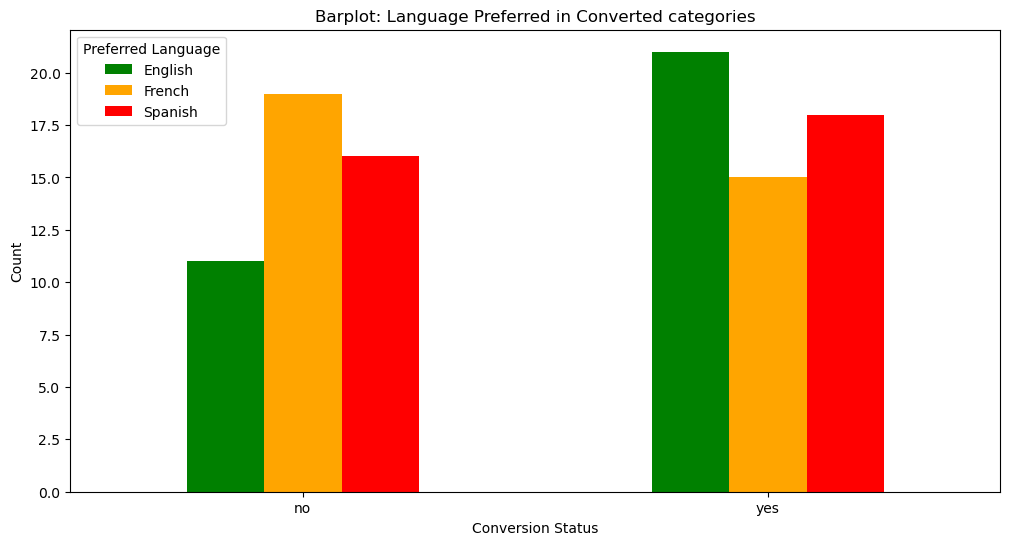

In [3209]:
# Unstack the multi-index DataFrame for plotting
# Since df_converted_language_pref is a multi-index DataFrame, it needs to be unstacked to create separate bars for "yes" and "no" conversion statuses.
df_converted_language_pref_plot = df_converted_language_pref.unstack(level=1)

# Plot the graph to show the counts for language preferred in converted categories(yes/no) for unstacked DataFrame
df_converted_language_pref_plot.plot(kind='bar', figsize=(12, 6), color=['green', 'orange','red'])

# Add title, labels, and legend
plt.title('Barplot: Language Preferred in Converted categories')
plt.xlabel('Conversion Status')
plt.ylabel('Count')
plt.legend(['English', 'French','Spanish'], title='Preferred Language', loc='upper left', fontsize=10)

# Adjust x-axis labels
plt.xticks(rotation=0)
plt.show()

In [3210]:
pd.crosstab(df['converted'],df['language_preferred'])

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


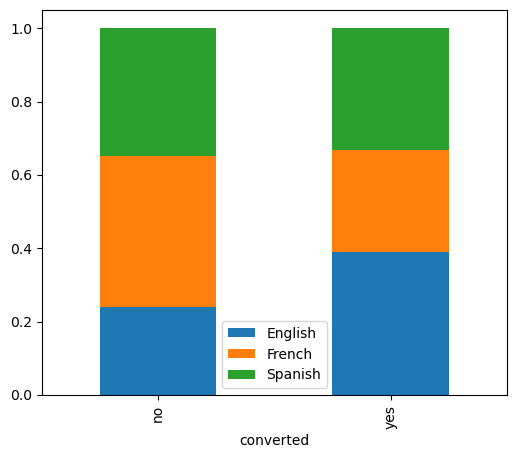

In [3211]:
# Plot#2 using pd.crosstab fn
# Plot to check if language preferred is dependent on the conversion rate
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,5),stacked=True)
plt.legend()
plt.show()

From the above plot we can obeserve that,
- *We can see a `significant increase` in number of users when the prefer language is `English` and a `very slight increase in users` who prefers `Spanish`*.
- *There is `decline` in number of users whose prefer language is `French`.*
- *We need to `perform further statistical analysis` to conclude whether converted status depend on the preferred language or not.*

### Step 1: Define the null and alternate hypotheses


**null hypothesis:**

$H_0$:  Converted status is independent of the preferred language

**alternate hypothesis:**

$H_a$:  Converted status depends on the preferred language

### Step 2: Select Appropriate test

- *This is the case for `Chi-Square Test for Independence`.*

**Let's test whether the assumptions are satisfied or not for Chi-Square Test for Independence.**

* `Categorical variables` - Yes `(converted(yes/no) and language_preferred(English,French and Spanish)`
* `Expected value of the number of sample observations` in each level of the variable is `at least 5` - Yes, the number of observations in each level is greater than 5.
* `Random sampling` from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

- *From the question, the significance level is given  $\alpha = 0.05$.*

### Step 4: Collect and prepare data

In [3220]:
#create a contingency table (cross table) for converted and language_preferred columns
contingency_table__for_converted_Lang_pref=pd.crosstab(df['converted'],df['language_preferred'])
contingency_table__for_converted_Lang_pref

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [3222]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df_converted_vs_langpref)
print('The p-value is', p_value)
print('The test statistic is', chi)
print('The degree of freedom is', dof)
print('TThe expected frequencies is', expected)

The p-value is 0.21298887487543447
The test statistic is 3.0930306905370837
The degree of freedom is 2
TThe expected frequencies is [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [3224]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- *Since the `p-value i.e probability value is greater than level of significance`  **$\alpha$** =.05, hence we `fail to reject the Null hypothesis` and      therefore `we do not have enough statistical evidence to conclude that converted status depends on the preferred language`. i.e. Converted status is independent of the preferred language*.


## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [3229]:
#create a new DataFrame for users for using new landing page
land_pg_new_cond=df['landing_page']=='new'
df_land_pg_new=df[land_pg_new_cond]


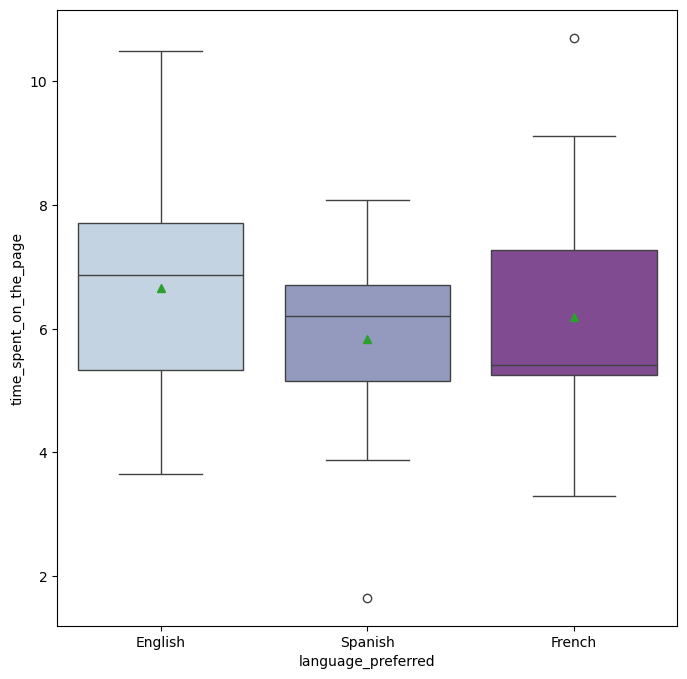

In [3230]:
#boxplot to show time spent by different language users on new landing page
plt.figure(figsize=(8,8))
sns.boxplot(data=df[df['landing_page']=='new'], x='language_preferred', y='time_spent_on_the_page',hue='language_preferred',palette='BuPu',showmeans=True);
plt.show()


- *Average time spent by all the different language users are in the range from 6.6 - 5.8 mins which is comparatively similar* 

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of English,French and Spanish different languages prefer by users respectively.

**null hypothesis**

>$H_0: \mu_1 = \mu_2 = \mu_3$: The time spent on the new landing page by the different language users are same 

**alternative hypothesis**

>$H_a: $ At least time spent on the new landing page by one language users is different from the rest.

### Step 2: Select Appropriate test

- *This is the case of `One-way Anova test`, concerning three population means.*

Now, we need to check first the the normality and equality of variance assumptions. 

* For testing of `normality, Shapiro-Wilk’s test` is applied to the response variable.

* For `equality of variance, Levene test` is applied to the response variable.

**`Shapiro-Wilk’s test`**

lets formulate the null and alternative hypothesis for this,

**null hypothesis:**

>$H_0:$ time spent by different language users follows a normal distribution 

**alternative hypothesis:**

>$H_a:$ time spent by different language users does not follow a normal distribution

In [3238]:
# Assumption 1: Normality
# find the p-value
w, p_value = stats.shapiro(df_land_pg_new['time_spent_on_the_page']) 

print('The p-value is', p_value)

The p-value is 0.8040040364746845


*Since `p_value is greater than level of significance`, we `fail to reject the null hypothesis`, hence `we have enough statistical evidence` to conclude that the `time spent by different language users follows a normal distribution`.*

**`Levene test`**

- *lets formulate the null and alternative hypothesis*

**null hypothesis:**

>$H_0:$ The population of all the groups have equal variance.

**alternative hypothesis:**

>$H_a:$ At least one of the population variances is different from the rest.

In [3242]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene

# calculate time spent by different languages (English,French and Spanish) users on new landing page
time_spent_English = df_land_pg_new[df_land_pg_new['language_preferred']=='English']['time_spent_on_the_page'] # for English users
time_spent_French = df_land_pg_new[df_land_pg_new['language_preferred']=='French']['time_spent_on_the_page']   # for French users
time_spent_Spanish = df_land_pg_new[df_land_pg_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # for Spanish users

# find the p-value
statistic, p_value = levene(time_spent_English,time_spent_French,time_spent_Spanish)

#Display p_value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


- *Since `p_value is greater than level of significance`, we `fail to reject the null hypothesis`, hence we have enough statistical evidence to conclude that the population of all the groups ( different language users on new landing page) have equal variance*.

### Step 3: Decide the significance level

- *As given in the problem statement, we set α = 0.05.*

### Step 4: Collect and prepare data

In [3247]:
#Calculate total and average time spent by different language users
tot_time_spent_OnNewPg_diff_lang_users=df[land_pg_new_cond].groupby('language_preferred')['time_spent_on_the_page'].sum()
mean_time_spent_OnNewPg_diff_lang_users=df[land_pg_new_cond].groupby('language_preferred')['time_spent_on_the_page'].mean()

#print the results
print('Total time spent by different language users are:',tot_time_spent_OnNewPg_diff_lang_users)
print('Average/mean time spent by different language users are:',mean_time_spent_OnNewPg_diff_lang_users)

Total time spent by different language users are: language_preferred
English   106.620
French    105.340
Spanish    99.200
Name: time_spent_on_the_page, dtype: float64
Average/mean time spent by different language users are: language_preferred
English   6.664
French    6.196
Spanish   5.835
Name: time_spent_on_the_page, dtype: float64


In [3248]:
# calculate time spent by different languages (English,French and Spanish) users on new landing page
time_spent_English = df_land_pg_new[df_land_pg_new['language_preferred']=='English']['time_spent_on_the_page'] # for English users
time_spent_French = df_land_pg_new[df_land_pg_new['language_preferred']=='French']['time_spent_on_the_page']   # for French users
time_spent_Spanish = df_land_pg_new[df_land_pg_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # for Spanish users


### Step 5: Calculate the p-value

In [3250]:
#import the required function
from scipy.stats import f_oneway

# find the p-value
statistic, p_value = f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)

#Display p_value
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [3252]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- *Since the `p-value i.e probability value is greater than level of significance`  **$\alpha$** =.05, hence we `fail to reject the Null hypothesis` and      therefore have `enough statistical evidence to conclude` that the `time spent on the new landing page by the different language users are same`*.


## Conclusion and Business Recommendations

**Insight:**

`E-news Express is an online news portal`, aims to expand its business by acquiring new subscribers. They provide faster access to the high-quality engaging content utilizing different technologies such as audio, graphics, video, and other interactive elements.

The dataset we have analyzed here consists of `100 randomly selected users` containg informations about `user id`, `two groups (control and treatment)` ,`time spent on page (in minutes)` on `landing page (old/new)` by `different language users (English,French and Spanish)` and their `conversion status(Yes/No)`. The users are divided equally into 2 groups. The `existing landing page` was introduced to `first group (control)` while  `second group (treatment)` served the `new landing page`. 

We have perform both `data analysis`(Exploratory Data Analysis ) and `statistical analysis(Hypothesis testing)` to understand the interaction of users in both the groups with the two versions of the landing page.

- *Below are the conclusions and recommendation from our analysis*.

### Conclusions:

*From the sample dataset of Enews Express, we were able to conclude that,*

- *On an `average` the users `spends more time(approx 6.2 mins) on new landing page`, than on the `existing old landing page(approx 4.5 mins)`, which also accounts for `50% of users`, indicating the new features and exciting contents on new landing page are engaging and attracting users.*
  
- *`Minimum time` spent by customers on `new landing page` is around `3 minutes` whereas it's `less than a minute on old landing page`, suggesting users are bored of existing landing page structures and are looking for additional sections and engaging contents.*
   
- *There is enough statistical evidence (p-value of 0.008 at 5% level of significance) to conclude  that `converion rate are higher for the new landing page when compared to old page`*.
  
- *`Conversion rates` are `higher in new landing page` (around `66 percent`) when compared to `old page( 42 percent)` , indicating users are appreciating the new changes and additional features on new landing page and subscribing to the portal*.
  
- *We do see a `significant increase` in English users and a `very slight increase in Spanish users`, but these subscription numbers are declined for the `French` users.*
-  *`Further statistical analysis`, reveal that there is `not enough statistical evidence (p-value of 0.21(greater than) at 5% level of significance)` to conclude that converted status depends on the preferred language`.*
  
-  *The portal provides 3 different languages `Spanish,French and English` to it's users for browsing contents on the portal*.
  
-  *`Average time spent` by all the different language users are comparatively same on the new landing page. With `English users(6.6 mins)` leading, followed  by `French(6.12 mins)` and `Spanish(5.8 mins)`users.*
 
- *There is ` enough statistical evidence (p-value of 0.43(greater than) at 5% level of significance)` to conclude that the time spent on the new landing page by the different language users are same.*




### Recommendations:

Below are the recommendation to the business :

- *We have noticed that `conversion rate is higher for the new landing page ` when compared to existing page, thus E-news Express `should roll out these new features to all users`, which can help them in to bring in `more subscribers, increase business, and boost company revenue`.*

- *We have observed if a `user spent more on time on landing page`,it usually means they find the content and features engaging and are `more likely to subscribe`. So by `adding high-value engaging content`, access to `premium content on discounted price` for brief moment of time can retain and attract more users.*

- *User sometimes want a `break from reading articles` so by `adding interactive sections like games, puzzles, crosswords, or quizzes` is better way of keeping them engaged.*  
  
- *We have also noticed in the `increase in subscriptions for English user on new page` but they have dropped for French users . Is it the less localized content offered or issue faced while accessing the additional content or  the look & feel of new page? though there is not much statistical evidence that language preference influence the subscriptions behavior, but we should analyze additional data further to retain the old users for future purpose.*  

- *By `offering free trials or limited-time access to premium content for new users`, so they can experience its benefits before subscribing can help company in getting more customers.*
